In [1]:
import numpy as np
import matplotlib.pyplot as plt
import lmfit

In [23]:
k_1 = 1.5
k_2 = 1.5

I_ast_1 = 1.5
I_ast_2 = 1.0

t_1 = 10
t_2 = 20

In [24]:
I_list = np.logspace(-1, 2, 10000)

def nek(I, k, I_ast, t):
    return t * np.exp((I_ast / I) ** k)

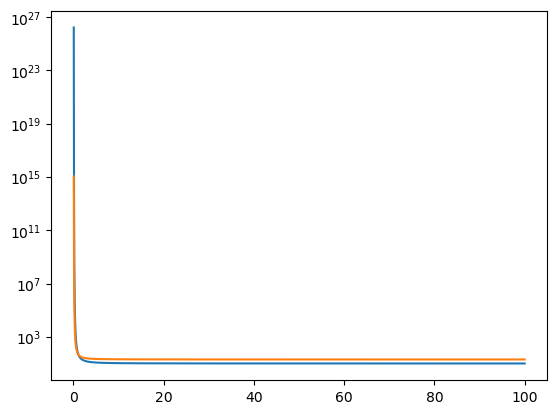

In [25]:
plt.plot(I_list, nek(I_list, k_1, I_ast_1, t_1))
plt.plot(I_list, nek(I_list, k_2, I_ast_2, t_2))
plt.yscale("log")

In [26]:
def resid_log_slope(params, I, data=None):
    a = params['a']
    b = params['b']
    model = a * np.log10(I) + b

    if data is None:
        return 10**model
    return model - np.log10(data)

[[Variables]]
    a:  0.54433105 +/- 9.8796e-19 (0.00%) (init = 1)
    b:  0.75669894 +/- 5.9784e-18 (0.00%) (init = 1)
[[Correlations]] (unreported correlations are < 0.100)
    C(a, b) = -0.568


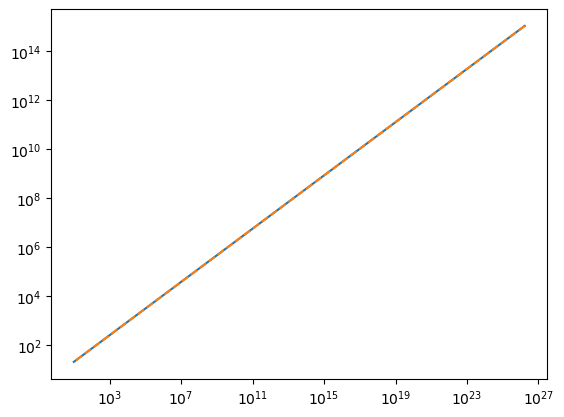

In [28]:
# plot the ratio
plt.plot(nek(I_list, k_1, I_ast_1, t_1),  nek(I_list, k_2, I_ast_2, t_2))

# fit the log slope

params = lmfit.Parameters()
params.add('a', value=1.0)
params.add('b', value=1.0)

out = lmfit.minimize(resid_log_slope, params, args=(nek(I_list, k_1, I_ast_1, t_1),), kws={'data': nek(I_list, k_2, I_ast_2, t_2)})

lmfit.report_fit(out.params)

plt.plot(nek(I_list, k_1, I_ast_1, t_1), resid_log_slope(out.params, nek(I_list, k_1, I_ast_1, t_1)), "--")


plt.xscale("log")
plt.yscale("log")

In [1]:
from sympy import *

In [33]:
# define the symbols

kappa_1, kappa_2, I_ast_1, I_ast_2, t_0_1, t_0_2 = symbols('kappa_1, kappa_2, I_ast_1, I_ast_2, t_0_1, t_0_2', real=True, positive=True)
alpha = symbols('alpha', real=True, positive=True)
beta = symbols('beta', real=True, positive=True)
I_0 = symbols('I_0', real=True, positive=True)
I_1 = symbols('I_1', real=True, positive=True)

In [34]:
# define an equation with one unknown parameter
eq1 = Eq(
    t_0_2 * exp((I_ast_2 / I_0)**kappa_2),
    alpha * t_0_1 * exp((I_ast_1 / I_0)**kappa_1) ** beta
)
eq2 = Eq(
    t_0_2 * exp((I_ast_2 / I_1)**kappa_2),
    alpha * t_0_1 * exp((I_ast_1 / I_1)**kappa_1) ** beta
)


In [35]:
eq1

Eq(t_0_2*exp((I_ast_2/I_0)**kappa_2), alpha*t_0_1*exp(beta*(I_ast_1/I_0)**kappa_1))

In [36]:
result = solve([eq1,eq2],(alpha, beta))

In [37]:
result

[(t_0_2*exp(I_ast_2**kappa_2*(I_0**(kappa_1 - kappa_2) - I_1**(kappa_1 - kappa_2))/(I_0**kappa_1 - I_1**kappa_1))/t_0_1,
  (I_0*I_1)**(kappa_1 - kappa_2)*((I_0*I_ast_2)**kappa_2 - (I_1*I_ast_2)**kappa_2)/(I_ast_1**kappa_1*(I_0**kappa_1 - I_1**kappa_1)))]

In [38]:
result[0][0]

t_0_2*exp(I_ast_2**kappa_2*(I_0**(kappa_1 - kappa_2) - I_1**(kappa_1 - kappa_2))/(I_0**kappa_1 - I_1**kappa_1))/t_0_1

In [39]:
result[0][1]

(I_0*I_1)**(kappa_1 - kappa_2)*((I_0*I_ast_2)**kappa_2 - (I_1*I_ast_2)**kappa_2)/(I_ast_1**kappa_1*(I_0**kappa_1 - I_1**kappa_1))

In [20]:
# print in python code
print('alpha =', result[0][0])

alpha = t_0_2*exp((I_ast_1/I_0)**kappa_1)**((1/(I_0*I_1))**kappa_2*((I_0*I_ast_2)**kappa_2 - (I_1*I_ast_2)**kappa_2)/((I_ast_1/I_0)**kappa_1 - (I_ast_1/I_1)**kappa_1))*exp((I_ast_2/I_0)**kappa_2)/t_0_1


In [21]:
result = solve([eq1],(alpha, beta))

In [22]:
# print in python code
print('alpha =', result[0][0])

alpha = t_0_2*exp((I_ast_2/I_0)**kappa_2)/(t_0_1*exp((I_ast_1/I_0)**kappa_1)**beta)


In [24]:
exp(I_0 ** 2)**3

exp(3*I_0**2)

In [30]:
exp(2 ** alpha) ** beta

exp(2**alpha*beta)